#0.Include Necessary Libraries

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import copy, math

#1.Preprocessing

In [18]:
#load CSV
df = pd.read_csv("titanicdata.csv")

# Split the data
train_data, temp_data = train_test_split(df, test_size=0.4, random_state=42)
validation_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

#Split features and target
X_train = train_data[["Pclass", "Sex", "Age"]]
y_train = train_data["Survived"]

X_val = validation_data[["Pclass", "Sex", "Age"]]
y_val = validation_data["Survived"]

X_test = test_data[["Pclass", "Sex", "Age"]]
y_test = test_data["Survived"]

#Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

Scikit-learn Logistic Regression Model Performance:
Accuracy: 0.8156424581005587
Precision: 0.8307692307692308
Recall: 0.7105263157894737
F1 Score: 0.7659574468085107


#2. Implementing Logistic Regression Model

In [ ]:
def sigmoid(z):

    σ = 1/(1+np.exp(-z))

    return σ

#Takes X y and w as numpy arrays.
def compute_cost_logistic(X, y, w, b):

    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)

    cost = cost / m
    return cost

def compute_gradient_logistic(X, y, w, b):

    m,n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)
        err_i  = f_wb_i  - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m
    dj_db = dj_db/m

    return dj_db, dj_dw

def gradient_descent(X, y, X_val, y_val, w_in, b_in, alpha, num_iters):

    J_history = []
    validation_loss_history = []
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):
        # Gradient
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)

        # Update Parameters
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Training loss
        training_loss = compute_cost_logistic(X, y, w, b)
        J_history.append(training_loss)

        # Validation loss
        validation_loss = compute_cost_logistic(X_val, y_val, w, b)
        validation_loss_history.append(validation_loss)

    return w, b, J_history, validation_loss_history

#3. Calculate training and validation losses across 100 iteration

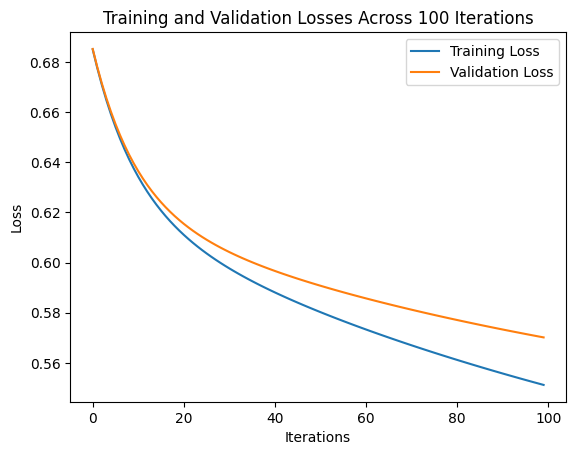

[0.6850199175408513,
 0.6776350151003072,
 0.6709163911967854,
 0.6647954206558558,
 0.6592103574261005,
 0.6541057560903729,
 0.6494319081226909,
 0.6451443034659108,
 0.6412031241519848,
 0.637572773748111,
 0.6342214442337917,
 0.6311207203486546,
 0.6282452203679391,
 0.6255722715500683,
 0.6230816180670037,
 0.6207551589989934,
 0.6185767138930045,
 0.6165318134038451,
 0.6146075126249508,
 0.6127922248468823,
 0.611075573637401,
 0.6094482613044654,
 0.6079019519736207,
 0.6064291676775347,
 0.6050231960143639,
 0.6036780080803738,
 0.6023881855198138,
 0.6011488556609019,
 0.5999556338209426,
 0.5988045719665661,
 0.5976921130074229,
 0.5966150500841877,
 0.5955704902852138,
 0.5945558222914412,
 0.5935686875070836,
 0.5926069542847532,
 0.5916686948990737,
 0.590752164962751,
 0.5898557850144377,
 0.5889781240388302,
 0.5881178847069873,
 0.587273890149043,
 0.5864450720929144,
 0.5856304602214453,
 0.5848291726171264,
 0.5840404071781637,
 0.5832634339027182,
 0.58249758794958

[0.685210735074247,
 0.6780205435755756,
 0.6715000382690177,
 0.6655801566069387,
 0.660198759084455,
 0.6553000465748001,
 0.6508339927164174,
 0.6467558019333196,
 0.6430253998061433,
 0.6396069595656848,
 0.636468466297818,
 0.6335813188809081,
 0.630919968592547,
 0.6284615926098371,
 0.6261858001939966,
 0.6240743691219086,
 0.6221110098459952,
 0.6202811548848342,
 0.6185717710362006,
 0.6169711921366281,
 0.6154689702487178,
 0.6140557433261487,
 0.6127231175775469,
 0.6114635629178429,
 0.6102703200555194,
 0.6091373179138744,
 0.6080591002227625,
 0.6070307602438461,
 0.6060478827072181,
 0.6051064921407945,
 0.6042030068667295,
 0.6033341980220814,
 0.6024971530348635,
 0.6016892430522357,
 0.6009080938757851,
 0.6001515600103694,
 0.5994177014785049,
 0.5987047630925343,
 0.5980111559123001,
 0.5973354406473746,
 0.5966763127905526,
 0.5960325892936897,
 0.5954031966184691,
 0.5947871600136624,
 0.5941835938872027,
 0.5935916931561677,
 0.59301072547083,
 0.5924400242204855

In [ ]:

alpha = 0.1


w_initial = np.zeros(X_train_scaled.shape[1])
b_initial = 0


w_trained, b_trained, training_loss_history, validation_loss_history = gradient_descent(X_train_scaled, y_train.values, X_val_scaled, y_val.values, w_initial, b_initial, alpha, 100)


plt.plot(range(len(training_loss_history)), training_loss_history, label='Training Loss')
plt.plot(range(len(validation_loss_history)), validation_loss_history, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training and Validation Losses Across 100 Iterations')
plt.legend()
plt.show()


#4. Varying number of iterations and step size

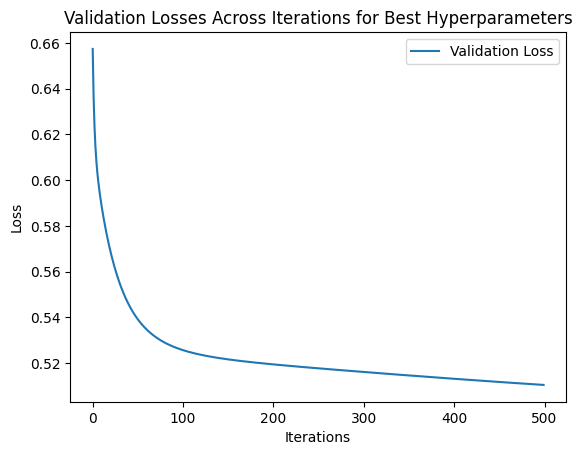

Best hyperparameters:
Step size: 0.5
Number of iterations: 500
Validation loss: 0.5105025803845864


In [ ]:

step_sizes = [0.01, 0.05, 0.1, 0.5]
num_iterations = [50, 100, 200, 500]

best_loss = float('inf')
best_params = {}

for step_size in step_sizes:
    for num_iter in num_iterations:

        w_trained, b_trained, training_loss_history, validation_loss_history = gradient_descent(X_train_scaled, y_train.values, X_val_scaled, y_val.values, w_initial, b_initial, step_size, num_iter)

        validation_loss = validation_loss_history[-1]

        if validation_loss < best_loss:
            best_loss = validation_loss
            best_params['step_size'] = step_size
            best_params['num_iterations'] = num_iter
            best_params['w_trained'] = w_trained
            best_params['b_trained'] = b_trained
            best_params['training_loss_history'] = training_loss_history
            best_params['validation_loss_history'] = validation_loss_history



plt.plot(range(len(best_params['validation_loss_history'])), best_params['validation_loss_history'], label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Validation Losses Across Iterations for Best Hyperparameters')
plt.legend()
plt.show()

print("Best hyperparameters:")
print("Step size:", best_params['step_size'])
print("Number of iterations:", best_params['num_iterations'])
print("Validation loss:", best_loss)


#5. Combining validation and training data

In [ ]:
# Combine
X_train_combined = np.vstack((X_train_scaled, X_val_scaled))
y_train_combined = np.concatenate((y_train.values, y_val.values))


# Retrain the final model with the chosen hyperparameters
final_w, final_b, _, _ = gradient_descent(X_train_combined, y_train_combined, X_test_scaled, y_test.values, best_params['w_trained'], best_params['b_trained'], best_params['step_size'], best_params['num_iterations'])

# Evaluate the final model on test data
test_loss = compute_cost_logistic(X_test_scaled, y_test.values, final_w, final_b)
print("Test Loss:", test_loss)


Test Loss: 0.4152676420264039


#6. Evaluate the accuracy

In [ ]:

y_pred = []
for i in range(len(X_test_scaled)):
    z_i = np.dot(X_test_scaled[i], final_w) + final_b
    y_pred_i = sigmoid(z_i)
    y_pred.append(1 if y_pred_i >= 0.5 else 0)


accuracy = np.mean(y_pred == y_test.values)
print("Accuracy on Test Data:", accuracy)


Accuracy on Test Data: 0.8100558659217877


#Scikit-Learn for making comparsion with my scracth in report (Not graded, not wanted in Homework)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Logistic Regression modelini tanımla ve eğit
model = LogisticRegression()
model.fit(X_train_combined, y_train_combined)

# Test verisi üzerinde modelin performansını değerlendir
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Sonuçları yazdır
print("Scikit-learn Logistic Regression Model Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Scikit-learn Logistic Regression Model Performance:
Accuracy: 0.8156424581005587
Precision: 0.8307692307692308
Recall: 0.7105263157894737
F1 Score: 0.7659574468085107
